# Predicting turbine energy yield (TEY) using ambient variables as features.

In [1]:
# Importing Required libraries for the dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras_tuner.tuners import RandomSearch
from scikeras.wrappers import KerasClassifier,KerasRegressor
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')

import warnings
warnings.filterwarnings('ignore')

In [2]:
gas_turbines=pd.read_csv("gas_turbines (1).csv")

In [3]:
gas_turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
gas_turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
gas_turbines.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [6]:
gas_turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
gas_turbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
gas_turbines.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [9]:
gas_turbines.sum()

AT      2.671585e+05
AP      1.523750e+07
AH      1.189948e+06
AFDP    6.316822e+04
GTEP    3.822773e+05
TIT     1.629925e+07
TAT     8.202213e+06
TEY     2.018060e+06
CDP     1.820073e+05
CO      2.966441e+04
NOX     1.025523e+06
dtype: float64

In [10]:
gas_turbines.shape

(15039, 11)

In [11]:
gas_turbines.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [12]:
gas_turbines.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [13]:
gas_turbines.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [14]:
gas_turbines.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [15]:
gas_turbines.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [16]:
numerical_features=gas_turbines.describe(include=["int64","float64"]).columns

In [17]:
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

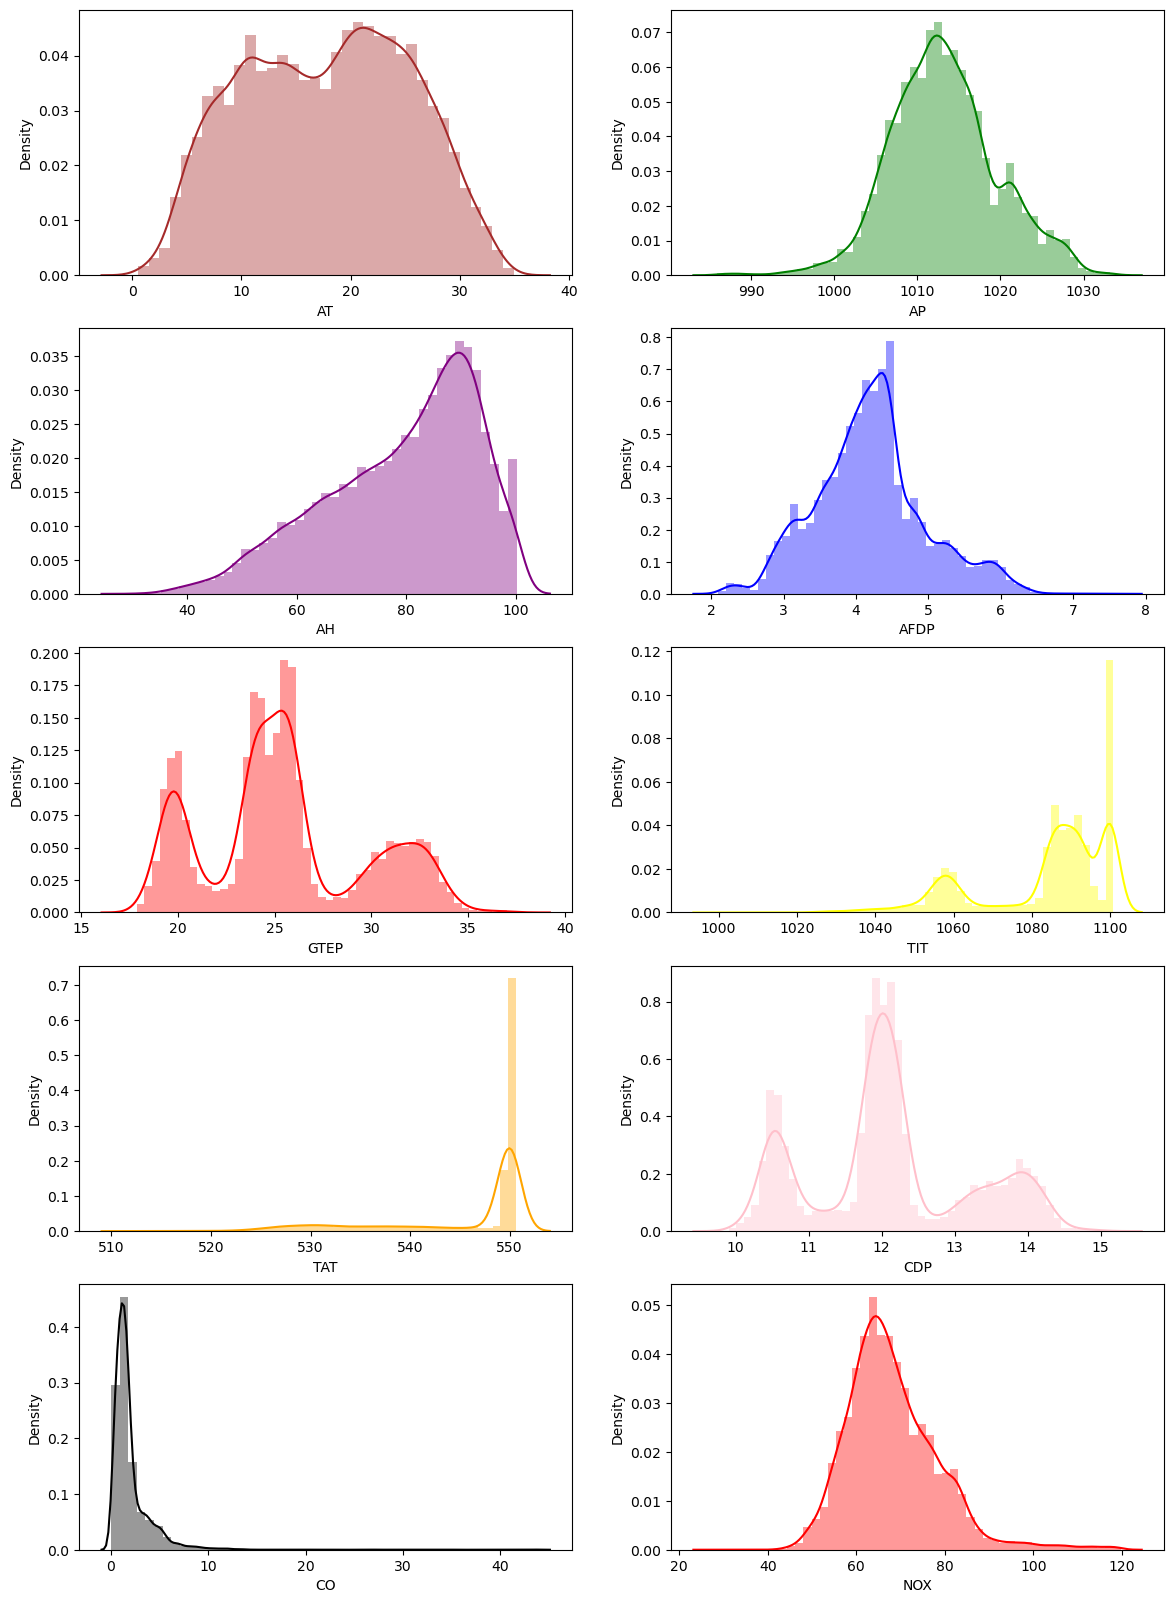

In [18]:
fig, ax = plt.subplots(5,2, figsize = (14,20))

sns.distplot(gas_turbines.AT, ax = ax[0,0],color="brown")
sns.distplot(gas_turbines.AP, ax = ax[0,1],color="green")
sns.distplot(gas_turbines.AH, ax = ax[1,0],color="purple")
sns.distplot(gas_turbines.AFDP, ax = ax[1,1],color="blue")
sns.distplot(gas_turbines.GTEP, ax = ax[2,0],color="red")
sns.distplot(gas_turbines.TIT, ax = ax[2,1],color="yellow")
sns.distplot(gas_turbines.TAT, ax = ax[3,0],color="orange")
sns.distplot(gas_turbines.CDP, ax = ax[3,1],color="pink")
sns.distplot(gas_turbines.CO, ax = ax[4,0],color="black")
sns.distplot(gas_turbines.NOX, ax = ax[4,1],color="red")

plt.show()

In [19]:
# Detect observations with more than one outlier

def outlier_hunt(gas_turbines):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    for col in gas_turbines.columns.tolist():         # iterate over features(columns)
        Q1 = np.percentile(gas_turbines[col],25)      # 1st quartile (25%)
        Q3 = np.percentile(gas_turbines[col],75)      # 3rd quartile (75%)
        IQR = Q3 - Q1                       # Interquartile rrange (IQR)

        outlier_step = 1.5 * IQR            # outlier step
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = gas_turbines[(gas_turbines[col] < Q1 - outlier_step) | (gas_turbines[col] > Q3 + outlier_step )].index
        
        # Append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # Select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(gas_turbines[numerical_features]))))

The dataset contains 1543 observations with more than 2 outliers


In [20]:
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

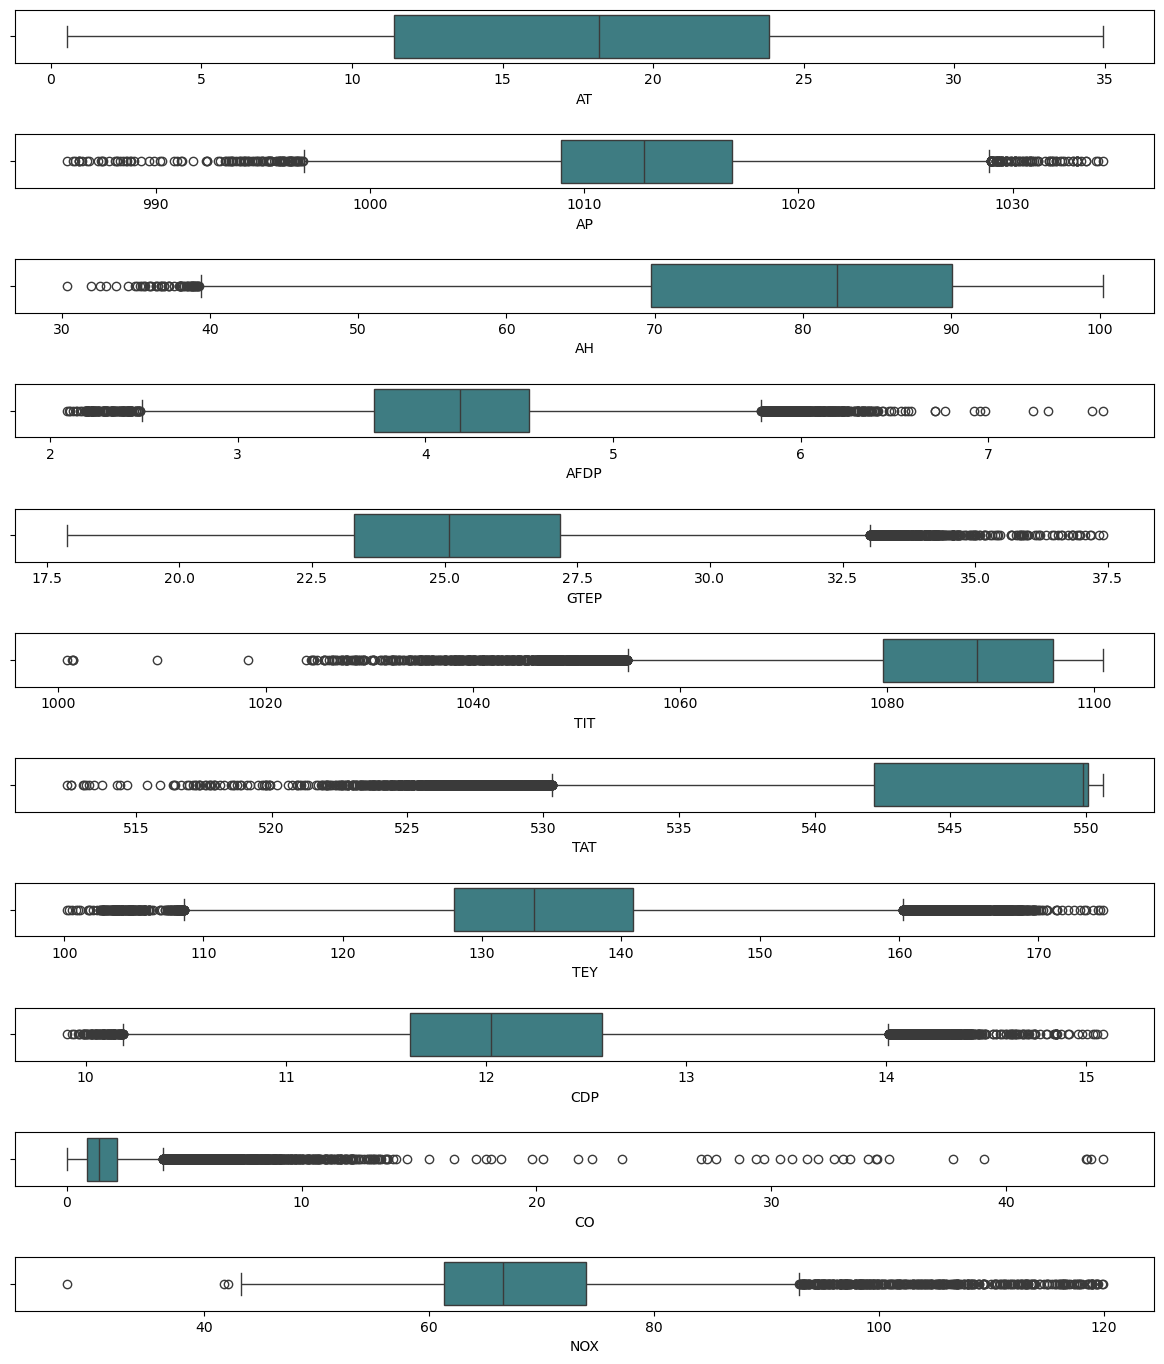

In [21]:
outlier = gas_turbines.copy() 
fig, axes=plt.subplots(11,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='AT',data= outlier,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data= outlier,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data= outlier,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data= outlier,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data= outlier,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data= outlier,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data= outlier,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data= outlier,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data= outlier,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data= outlier,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data= outlier,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

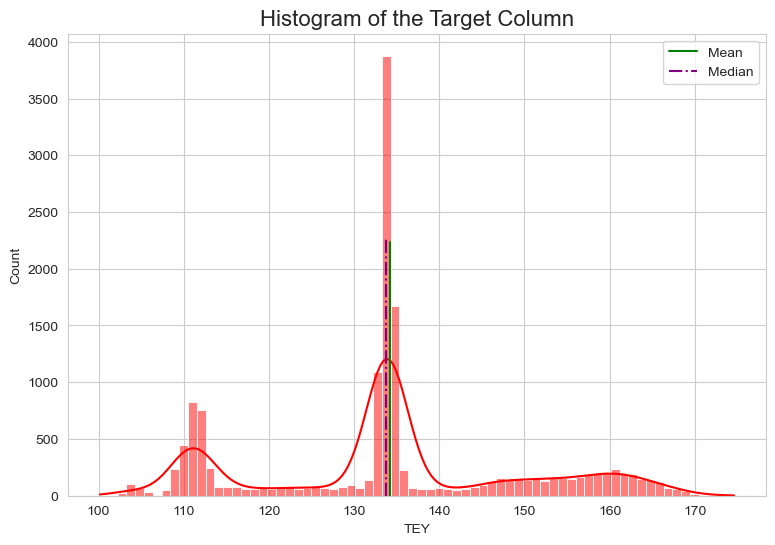

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
sns.histplot(data=gas_turbines,x="TEY",color="red",kde=True)
plt.axvline(x=gas_turbines["TEY"].mean(), ymax= 0.55, color= "green", linestyle= "solid", label= "Mean")
plt.axvline(x=gas_turbines["TEY"].median(), ymax= 0.56, color= "purple", linestyle= "dashdot",label= "Median")
plt.title("Histogram of the Target Column", fontsize=16)
plt.legend();

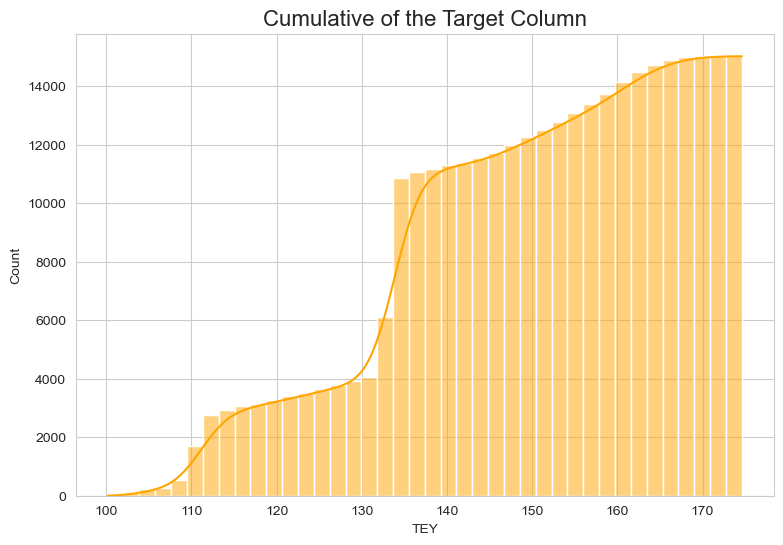

In [23]:
plt.figure(figsize=(9,6))
sns.histplot(gas_turbines["TEY"],kde=True,bins=40,color="orange",cumulative=True)
plt.title("Cumulative of the Target Column", fontsize=16);

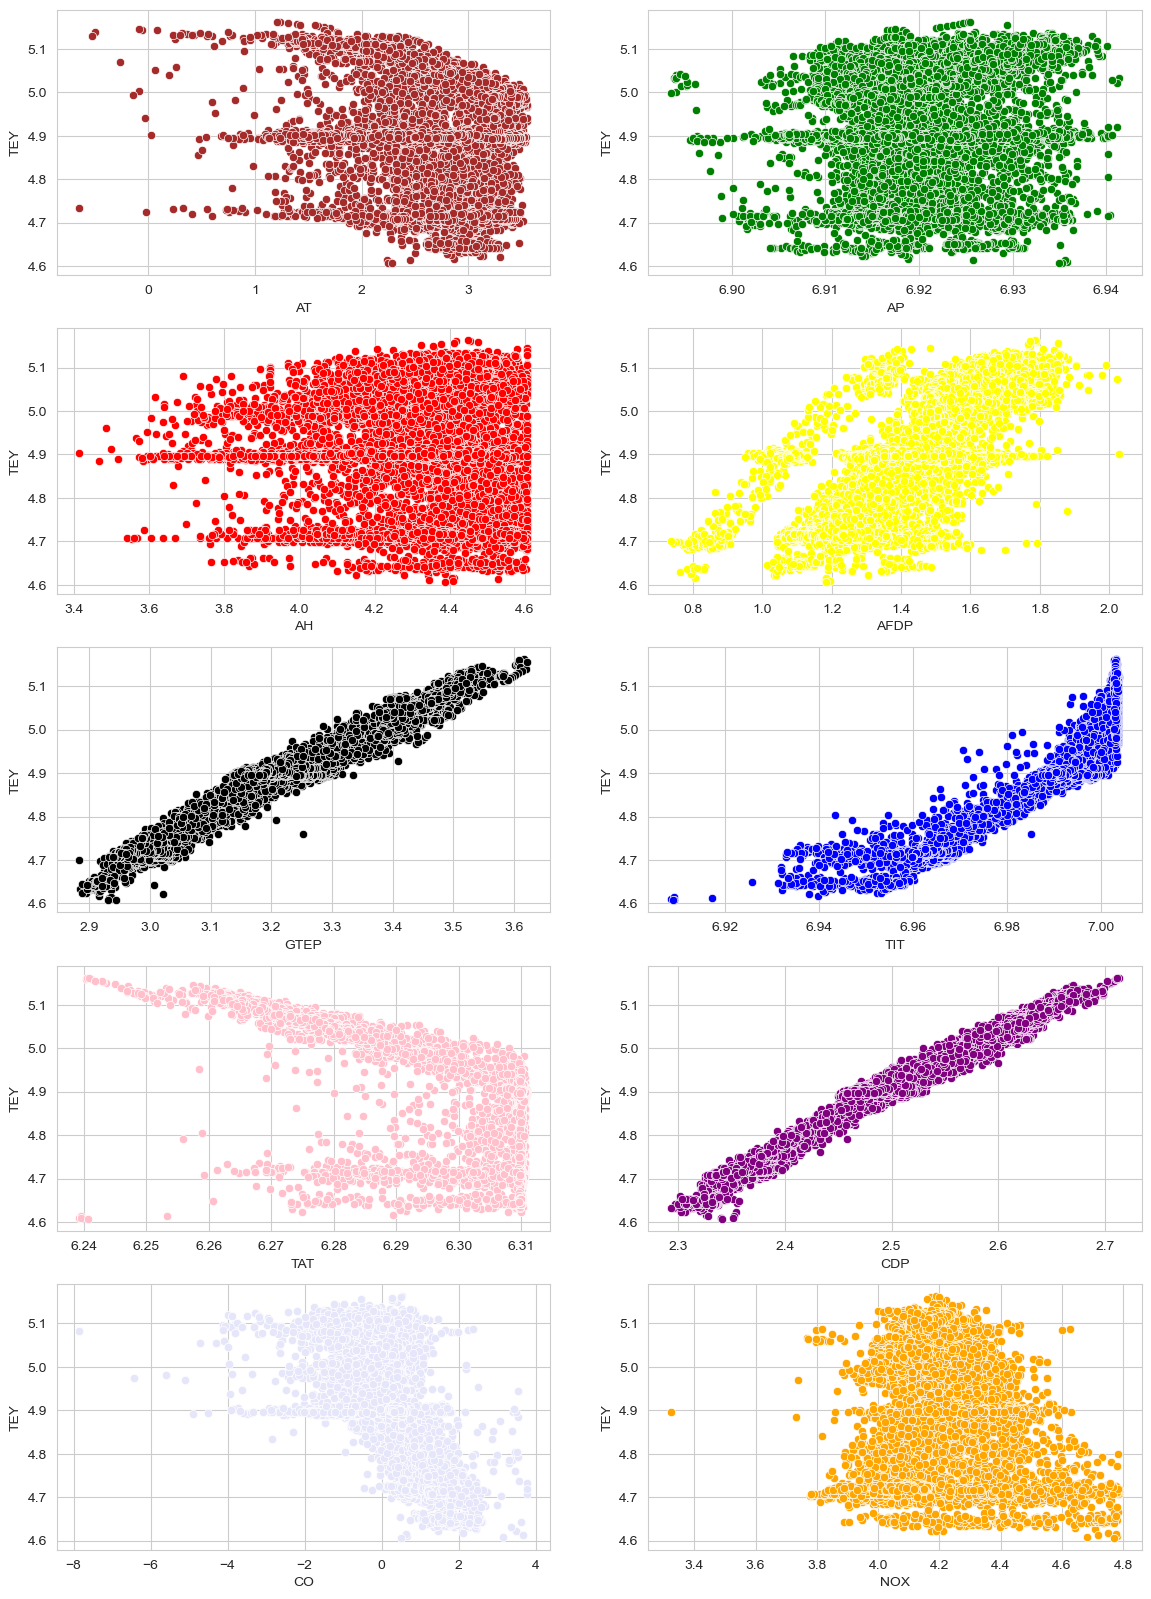

In [24]:
# Multivariate Analysis

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(5, 2, figsize=(14, 20))

# Assuming gas_turbines is your DataFrame
sns.scatterplot(x=np.log(gas_turbines['AT']), y=np.log(gas_turbines['TEY']), ax=ax[0, 0],color="brown")
sns.scatterplot(x=np.log(gas_turbines['AP']), y=np.log(gas_turbines['TEY']), ax=ax[0, 1],color="green")
sns.scatterplot(x=np.log(gas_turbines['AH']), y=np.log(gas_turbines['TEY']), ax=ax[1, 0],color="red")
sns.scatterplot(x=np.log(gas_turbines['AFDP']), y=np.log(gas_turbines['TEY']), ax=ax[1, 1],color="yellow")
sns.scatterplot(x=np.log(gas_turbines['GTEP']), y=np.log(gas_turbines['TEY']), ax=ax[2, 0],color="black")
sns.scatterplot(x=np.log(gas_turbines['TIT']), y=np.log(gas_turbines['TEY']), ax=ax[2, 1],color="blue")
sns.scatterplot(x=np.log(gas_turbines['TAT']), y=np.log(gas_turbines['TEY']), ax=ax[3, 0],color="pink")
sns.scatterplot(x=np.log(gas_turbines['CDP']), y=np.log(gas_turbines['TEY']), ax=ax[3, 1],color="purple")
sns.scatterplot(x=np.log(gas_turbines['CO']), y=np.log(gas_turbines['TEY']), ax=ax[4, 0],color="lavender")
sns.scatterplot(x=np.log(gas_turbines['NOX']), y=np.log(gas_turbines['TEY']), ax=ax[4, 1],color="orange")

plt.show()

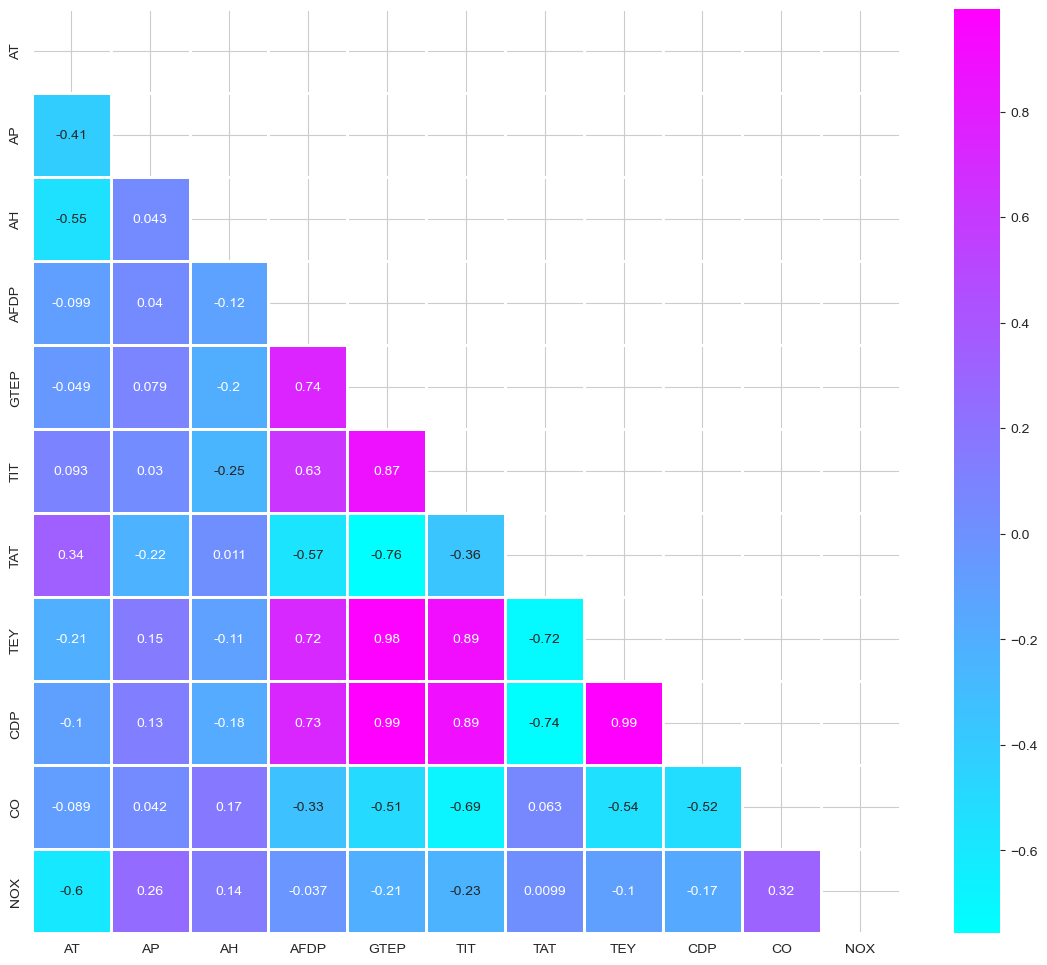

In [25]:
# Correlation Matrix

plt.figure(figsize=(14,12))
mask=np.zeros_like(gas_turbines.corr(),dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=gas_turbines.corr(),cmap="cool",annot=True,linewidths=1,linecolor="white",mask=mask);

In [26]:
from sklearn.ensemble import IsolationForest
gas_turbines1=gas_turbines.copy()

clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(gas_turbines1)
gas_turbines1['anamoly'] = clf.predict(gas_turbines1.iloc[:,0:11])
outliers = gas_turbines1[gas_turbines1['anamoly']==-1]

In [27]:
outliers

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,anamoly
261,5.66020,1018.30,86.968,3.8404,21.079,1028.5,523.86,112.02,10.963,43.4280,99.237,-1
553,3.55320,1027.30,90.871,4.2162,21.464,1041.2,531.68,117.76,10.984,8.8254,106.840,-1
763,1.81300,1007.20,74.980,3.6967,19.958,1026.4,528.18,111.72,10.553,12.0900,114.940,-1
764,1.49880,1006.30,76.734,3.7063,20.041,1027.6,528.79,112.28,10.585,11.6520,112.830,-1
765,0.97877,1005.70,78.978,3.7379,20.084,1027.9,528.52,112.71,10.628,11.6910,108.880,-1
993,4.36570,1021.60,85.528,3.9574,20.263,1025.6,525.72,111.35,10.652,12.7860,112.270,-1
6896,17.13200,1010.80,80.503,2.2148,18.484,1034.1,539.98,102.07,10.182,11.5150,110.760,-1
7019,7.02760,997.23,97.761,2.0992,19.227,1037.2,538.53,109.63,10.338,11.0440,105.060,-1
7470,7.04730,1019.60,96.885,2.4558,19.501,1032.0,532.32,109.21,10.567,11.3740,112.230,-1
9920,15.17900,1017.60,71.630,2.7816,18.435,1027.8,533.45,103.64,10.143,12.1440,113.800,-1


In [28]:
gas_turbines.shape

(15039, 11)

In [29]:
gas_turbines=gas_turbines.drop(outliers.index)
gas_turbines.shape

(15023, 11)

In [30]:

gas_turbines=gas_turbines.reset_index()
gas_turbines=gas_turbines.drop("index",axis=1)
gas_turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15018,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15019,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15020,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15021,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [31]:
gas_turbines = gas_turbines.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)

In [32]:
gas_turbines.shape

(15023, 7)

In [33]:
# Converting independent features into normalised and standardized data

from sklearn.preprocessing import MinMaxScaler,StandardScaler

norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(gas_turbines), columns=gas_turbines.columns)      #data between -3 to +3
df_std = pd.DataFrame(std.fit_transform(gas_turbines), columns=gas_turbines.columns)        #data between -1 to +1

In [34]:
df_norm

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522
1,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372
2,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576
3,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375
4,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647
...,...,...,...,...,...,...,...
15018,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448
15019,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894
15020,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552
15021,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693


In [35]:
df_std

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,-0.923012,-1.381262,-1.501236,0.584296,-1.234002,-1.359605,0.558318
1,-0.923275,-1.365681,-1.495148,0.584296,-1.232737,-1.365954,0.596348
2,-0.946177,-1.353456,-1.489061,0.567731,-1.233369,-1.363233,0.579990
3,-0.948678,-1.350340,-1.476885,0.583021,-1.232737,-1.358698,0.575842
4,-0.926171,-1.356812,-1.470797,0.581747,-1.232737,-1.353256,0.601987
...,...,...,...,...,...,...,...
15018,-0.867599,-1.500878,-2.079571,0.101373,-1.429387,-1.545539,1.193958
15019,-0.915246,-1.440950,-2.286555,-0.279614,-1.418637,-1.515608,1.347008
15020,-0.953285,-1.413144,-2.810100,-1.031393,-1.519176,-1.470258,2.799300
15021,-0.990666,-1.449820,-2.475275,-0.531906,-1.484398,-1.424908,2.000590


In [36]:
temp = df_std.sample(frac=1)
temp_s = df_std.sample(frac=0.2)

In [37]:
# Splitting data into target variable and independent variables

x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']


In [38]:
x

,AFDP,GTEP,TIT,TAT,CDP,CO
6425,0.360307,-0.166644,0.191156,0.572828,-0.090715,-0.082028
603,2.142211,1.915250,0.982562,-2.263546,1.823956,-0.542449
8136,-0.559602,-0.488577,-0.082793,0.512940,-0.317465,-0.377595
5791,0.276990,0.080738,0.550332,0.619973,0.173221,-0.392368
14799,-0.233837,-0.255098,0.172893,0.586844,-0.195020,-0.309738
...,...,...,...,...,...,...
3489,-0.236733,-0.021379,0.367700,0.579199,0.010868,-0.115397
6823,-2.586324,-1.487934,-2.158712,-0.178952,-1.460281,2.266796
12299,-0.299911,0.095840,0.574683,0.553715,0.001798,-0.548107
14702,-0.878260,-1.500399,-1.781272,0.585570,-1.527399,0.771348


In [39]:
y

6425    -0.151479
603      1.711321
8136    -0.009840
5791     0.090066
14799    0.033790
           ...   
3489     0.014188
6823    -1.415476
12299   -0.030074
14702   -1.485031
7202     2.086916
Name: TEY, Length: 3005, dtype: float64

In [40]:
# Creating train and test data for model validation

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2253, 6), (752, 6), (2253,), (752,))

In [42]:
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [43]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()


Here is the summary of the model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 152 (608.00 Byte)
Trainable params: 152 (608.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [45]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11841 (46.25 KB)
Trainable params: 11841 (46.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________

In [46]:
print("Predicted values:")
model2.predict(x_test[:10])

Predicted values:
1/1 [==============================] - 0s 430ms/step


array([[-5.5308810e-05],
       [-1.2731811e-04],
       [-2.8066948e-04],
       [ 8.8843281e-06],
       [-3.3183715e-06],
       [ 9.9264653e-05],
       [-1.7914113e-06],
       [-2.5568058e-04],
       [-5.2456875e-05],
       [ 4.5885485e-05]], dtype=float32)

In [47]:
print('Actual values')
y_test[:10]

Actual values


3554    -0.086983
1530     0.913972
10307    1.376194
14857   -0.011105
6037    -0.062322
9619    -1.484398
14036    0.029996
12141    0.805846
8314     0.516878
6181    -1.578613
Name: TEY, dtype: float64

In [48]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)




71/71 [==============================] - 1s 3ms/step - loss: 0.9785 - mse: 0.9785 - mae: 0.6899 - mape: 100.0152

 Results for model 2: 
 Training Loss: 0.9784819483757019 
 Training Mean Absolute Error: 0.9784819483757019 
 Training Mean Squared Error: 0.6899345517158508


In [49]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)

24/24 [==============================] - 0s 3ms/step - loss: 1.0445 - mse: 1.0445 - mae: 0.7261 - mape: 100.0160

 Results for model 2: 
 Test Loss: 1.044542670249939 
 Test Mean Absolute Error: 1.044542670249939 
 Test Mean Squared Error: 0.7261127829551697


In [50]:
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)
batch_size = [30,50,70]
epochs = [300,500,800]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=30, epochs=300...................................
[CV 1/5; 1/9] END ....batch_size=30, epochs=300;, score=0.992 total time=  55.7s
[CV 2/5; 1/9] START batch_size=30, epochs=300...................................
[CV 2/5; 1/9] END ....batch_size=30, epochs=300;, score=0.993 total time=  54.1s
[CV 3/5; 1/9] START batch_size=30, epochs=300...................................
[CV 3/5; 1/9] END ....batch_size=30, epochs=300;, score=0.993 total time=  54.7s
[CV 4/5; 1/9] START batch_size=30, epochs=300...................................
[CV 4/5; 1/9] END ....batch_size=30, epochs=300;, score=0.992 total time=  53.7s
[CV 5/5; 1/9] START batch_size=30, epochs=300...................................
[CV 5/5; 1/9] END ....batch_size=30, epochs=300;, score=0.995 total time=  53.2s
[CV 1/5; 2/9] START batch_size=30, epochs=500...................................
[CV 1/5; 2/9] END ....batch_size=30, epochs=500;,

In [51]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9929176825508057, using {'batch_size': 30, 'epochs': 300}
0.9929176825508057,0.0009609926165996006 with: {'batch_size': 30, 'epochs': 300}
0.9920952695644554,0.0010750163841618747 with: {'batch_size': 30, 'epochs': 500}
0.992850268979708,0.0019976694896977976 with: {'batch_size': 30, 'epochs': 800}
0.988310926149459,0.0038689431389037827 with: {'batch_size': 50, 'epochs': 300}
0.9913700965523308,0.0035743377648993924 with: {'batch_size': 50, 'epochs': 500}
0.9919635367584725,0.0030803245330703675 with: {'batch_size': 50, 'epochs': 800}
0.9921539591108616,0.0018127222054664465 with: {'batch_size': 70, 'epochs': 300}
0.9923090603390137,0.0012342096326901013 with: {'batch_size': 70, 'epochs': 500}
0.9922930595767273,0.0025761950183016188 with: {'batch_size': 70, 'epochs': 800}


In [52]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Standardize the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Convert y_train to a NumPy array to handle indexing
y_train = np.array(y_train)

# Define the model function
def create_model_three_hidden_layers(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Assuming a regression task

    return model

# Loop through each fold
for train_index, val_index in kf.split(x_train_scaled):
    train_index = train_index.astype(int)  # Ensure indices are integers
    val_index = val_index.astype(int)      # Ensure indices are integers

    x_train_kf, x_val_kf = x_train_scaled[train_index], x_train_scaled[val_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]

    model = create_model_three_hidden_layers(input_dim=x_train_scaled.shape[1])

    # Add Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(x_train_kf, y_train_kf, validation_data=(x_val_kf, y_val_kf),
                        epochs=100, batch_size=32, callbacks=[early_stopping])

    # Evaluate the model on the validation set
    val_predictions = model.predict(x_val_kf)
    val_mse = mean_squared_error(y_val_kf, val_predictions)
    print(f'Validation MSE: {val_mse}')




Epoch 1/100
57/57 [==============================] - 2s 11ms/step - loss: 0.2222 - val_loss: 0.0177
Epoch 2/100
57/57 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.0147
Epoch 3/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.0131
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.0117
Epoch 5/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.0106
Epoch 6/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0092 - val_loss: 0.0103
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0110
Epoch 8/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0105
Epoch 9/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0100
Epoch 10/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0086 - val_loss: 0.0098
Epoch 1

In [53]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9929176825508057, using {'batch_size': 30, 'epochs': 300}
0.9929176825508057,0.0009609926165996006 with: {'batch_size': 30, 'epochs': 300}
0.9920952695644554,0.0010750163841618747 with: {'batch_size': 30, 'epochs': 500}
0.992850268979708,0.0019976694896977976 with: {'batch_size': 30, 'epochs': 800}
0.988310926149459,0.0038689431389037827 with: {'batch_size': 50, 'epochs': 300}
0.9913700965523308,0.0035743377648993924 with: {'batch_size': 50, 'epochs': 500}
0.9919635367584725,0.0030803245330703675 with: {'batch_size': 50, 'epochs': 800}
0.9921539591108616,0.0018127222054664465 with: {'batch_size': 70, 'epochs': 300}
0.9923090603390137,0.0012342096326901013 with: {'batch_size': 70, 'epochs': 500}
0.9922930595767273,0.0025761950183016188 with: {'batch_size': 70, 'epochs': 800}


In [54]:
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [55]:
%time
epochs=300
batch_size=70

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
    final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

CPU times: total: 0 ns
Wall time: 0 ns
Here is the summary of our final model:
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_259 (Dense)           (None, 8)                 56        
                                                                 
 dense_260 (Dense)           (None, 128)               1152      
                                                                 
 dense_261 (Dense)           (None, 64)                8256      
                                                                 
 dense_262 (Dense)           (None, 128)               8320      
                                                                 
 dense_263 (Dense)           (None, 1)                 129       
                                                                 
Total params: 17913 (69.97 KB)
Trainable params: 17913 (69.97 KB)
Non-trainable params: 0 (0.00 Byte)
____

In [56]:
loss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)


71/71 [==============================] - 1s 3ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0631 - mape: 124.1077

 Results for final model : 
 Training Loss: 0.007230179384350777 
 Training Mean Absolute Error: 0.007230179384350777 
 Training Mean Squared Error: 0.06311629712581635


In [57]:
loss_t, mae_t, mse_t, mape_t = final_model.evaluate(x_test, y_test)
print('\n', "Results for final model :", '\n', "Test Loss:", loss_t, '\n', "Test Mean Absolute Error:" , mae_t, '\n', "Test Mean Squared Error:", mse_t)


24/24 [==============================] - 2s 3ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0689 - mape: 166.2030

 Results for final model : 
 Test Loss: 0.009248396381735802 
 Test Mean Absolute Error: 0.009248396381735802 
 Test Mean Squared Error: 0.0689416155219078


In [58]:
# Predicting values from Model using same dataset

y_predict_test = final_model.predict(x_test)

predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

24/24 [==============================] - 0s 3ms/step
(752, 8)


,AFDP,GTEP,TIT,TAT,CDP,CO,Actual,Predicted
3554,-0.003629,0.139707,0.495543,0.556263,0.068009,-0.425225,-0.086983,-0.037780
1530,1.639413,0.917571,0.958211,-0.349695,0.740094,-0.574597,0.913972,0.796515
10307,0.402952,1.480653,0.982562,-1.458251,1.442110,-0.456683,1.376194,1.277919
14857,-0.255949,-0.391014,0.130278,0.572828,-0.261231,-0.086083,-0.011105,-0.003523
6037,0.002162,-0.214587,0.209419,0.557537,-0.089808,0.136221,-0.062322,-0.017390
9619,-0.737951,-1.550738,-1.817799,0.500198,-1.536469,0.651528,-1.484398,-1.569380
14036,-0.260556,-0.241914,0.203331,0.618699,-0.014528,-0.320458,0.029996,-0.037628
12141,0.329507,1.134030,1.006913,-0.647858,1.043031,-0.780198,0.805846,0.867686
8314,-0.121695,0.080498,0.166805,-0.198065,0.231269,-0.586691,0.516878,0.281758
6181,-0.795733,-1.483859,-1.866501,0.507843,-1.492026,1.806482,-1.578613,-1.695676


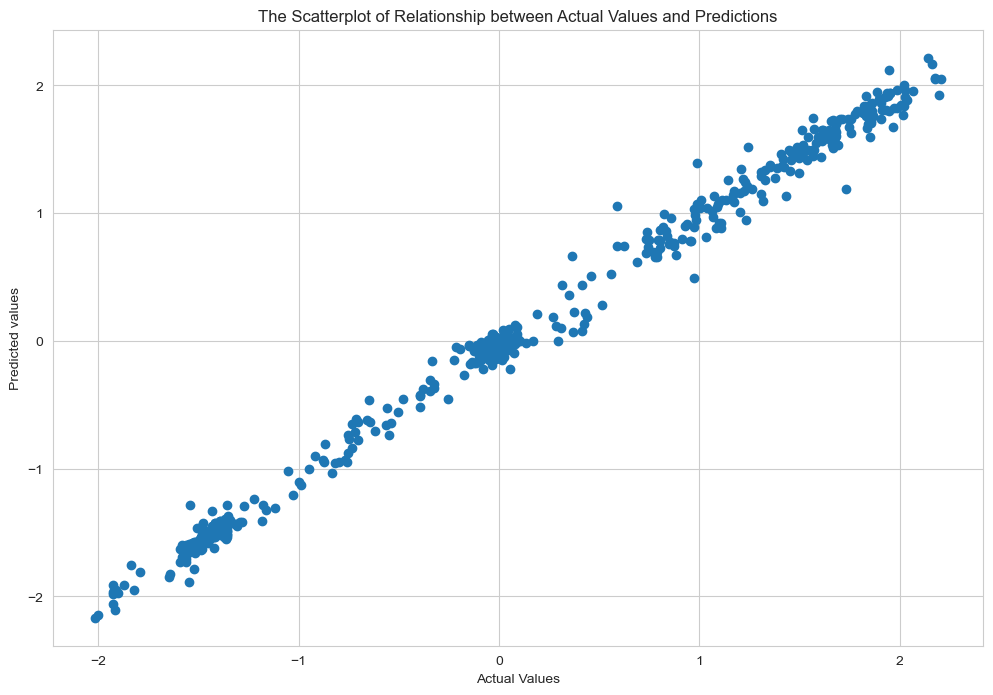

In [59]:
# Visualizing the Relationship between the Actual and Predicted Values Model Validation

plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])